## K-Nearest Neighbors with Cross-Validation (tie-breaking rule)

Ties occur when multiple classes have the same number of votes among the k nearest neighbors. Different software libraries and implementations use various strategies:

- Random Selection: Simply select one random class
- Sort the values and pick the first occurrence (in Scikit-Learn)
- Increase or Reduce K until there are no ties


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('knn_dataset.csv')
# New predicted sample
A = [2, 8]
# Euclidean distance between A and all points
# We are not using square root for this lab
df['Distance'] = (df['x'] - A[0]) ** 2 + (df['y'] - A[1]) ** 2
df

,x,y,label,Distance
0,1,9,Red,2
1,3,9,Red,2
2,9,9,Blue,50
3,4,8,Green,4
4,7,8,Blue,25
5,1,7,Blue,2
6,3,7,Blue,2
7,4,7,Red,5
8,8,7,Green,37
9,2,5,Purple,9


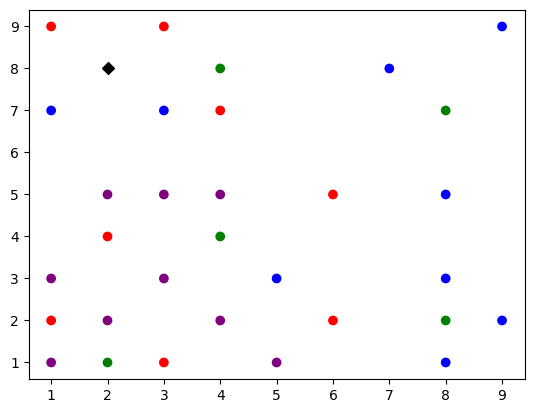

In [48]:
# Draw scatter plot (for reference)
plt.scatter(df['x'], df['y'], c=df['label'])
# Put A to the [2, 8] coordinate (show its name)
plt.scatter(A[0], A[1], c='black', marker='D')

In [40]:
# Select K and select the nearest K neighbors by sorting
K = 2
df_sorted = df.sort_values(by='Distance')
df_nearest = df_sorted.head(K)
df_nearest

,x,y,label,Distance
0,1,9,Red,2
1,3,9,Red,2


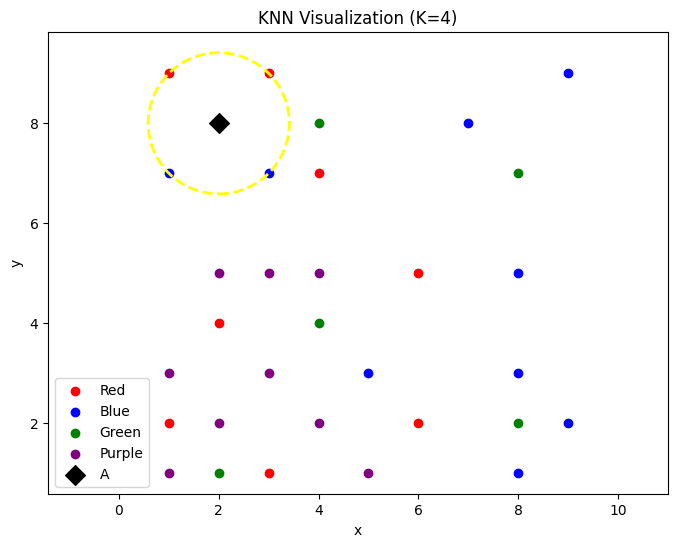

In [53]:
K = 4
df_nearest = df_sorted.head(K)
# Draw nearest neighbor circle for A
# Scatter plot of all points (color-coded by label)
plt.figure(figsize=(8,6))
for label, color in zip(['Red', 'Blue', 'Green', 'Purple'], ['red', 'blue', 'green', 'purple']):
    subset = df[df['label'] == label]
    plt.scatter(subset['x'], subset['y'], c=color, label=label)

# Plot point A
plt.scatter(A[0], A[1], c='black', marker='D', s=100, label='A')

# Draw circle around A that covers its K nearest neighbor(s)
# Circle radius = Euclidean distance to the farthest neighbor among K nearest
radius = np.sqrt(df_nearest['Distance'].max())
circle = plt.Circle((A[0], A[1]), radius, color='yellow', fill=False, linestyle='--', linewidth=2)
plt.gca().add_patch(circle)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'KNN Visualization (K={K})')
plt.legend()
plt.axis('equal')
plt.show()

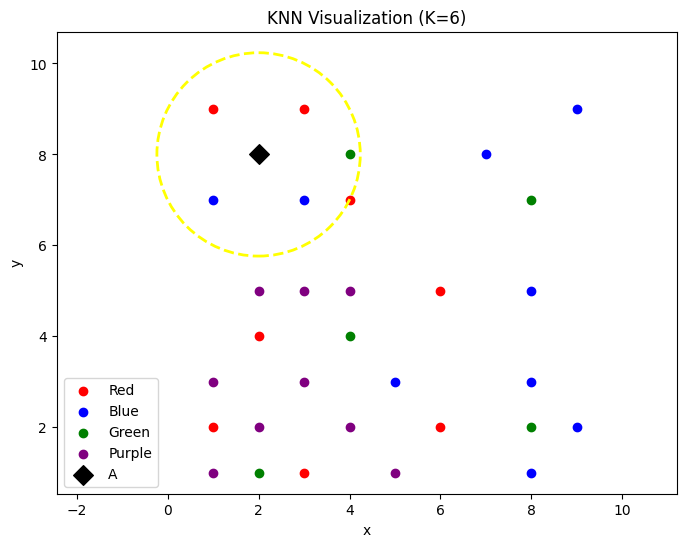

In [54]:
K = 6
df_nearest = df_sorted.head(K)
# Draw nearest neighbor circle for A
# Scatter plot of all points (color-coded by label)
plt.figure(figsize=(8,6))
for label, color in zip(['Red', 'Blue', 'Green', 'Purple'], ['red', 'blue', 'green', 'purple']):
    subset = df[df['label'] == label]
    plt.scatter(subset['x'], subset['y'], c=color, label=label)

# Plot point A
plt.scatter(A[0], A[1], c='black', marker='D', s=100, label='A')

# Draw circle around A that covers its K nearest neighbor(s)
# Circle radius = Euclidean distance to the farthest neighbor among K nearest
radius = np.sqrt(df_nearest['Distance'].max())
circle = plt.Circle((A[0], A[1]), radius, color='yellow', fill=False, linestyle='--', linewidth=2)
plt.gca().add_patch(circle)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'KNN Visualization (K={K})')
plt.legend()
plt.axis('equal')
plt.show()

## Cross Validation in K-Nearest Neighbors

In [59]:
# Cross Validation with pandas and loops
K_max = int(np.sqrt(len(df)))  # common heuristic
accuracies = []

# This loop tests all K from 1 to sqrt(N).
for K in range(1, K_max+1):
    correct = 0
    for i in range(len(df)):
        # leave-one-out
        validation = df.iloc[i]
        train = df.drop(i)
        # compute distances to A
        train['Distance'] = (train['x'] - validation['x'])**2 + (train['y'] - validation['y'])**2
        nearest = train.sort_values('Distance').head(K)
        # majority vote
        votes = nearest['label'].value_counts()
        prediction = votes.idxmax()

        if prediction == validation['label']:
            correct += 1
    accuracies.append((K, correct/len(df)))
# Accuracy for each K → pick the best K.
print("Accuracy:", accuracies)
print("Best K:", max(accuracies)[0])

Accuracy: [(1, 0.0967741935483871), (2, 0.0967741935483871), (3, 0.1935483870967742), (4, 0.3548387096774194), (5, 0.3870967741935484)]
Best K: 5
